In [5]:
dataset='/content/drive/MyDrive/Salary_Dataset.csv'
import pandas as pd
df=pd.read_csv(dataset)

df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


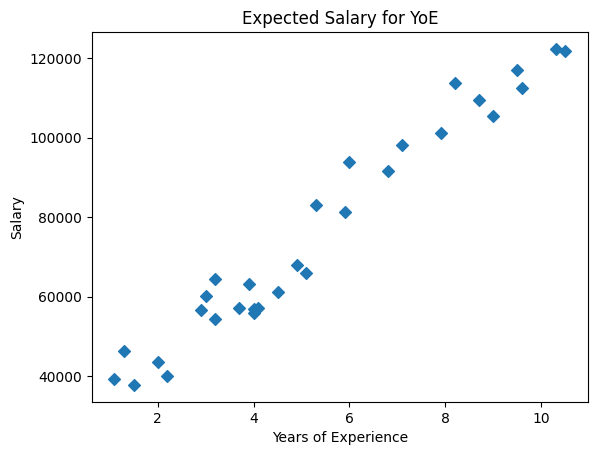

In [6]:
import matplotlib.pyplot as plt

#create a scatter plot
plt.scatter(df.YearsExperience,df.Salary, marker='D')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Expected Salary for YoE")

plt.show()

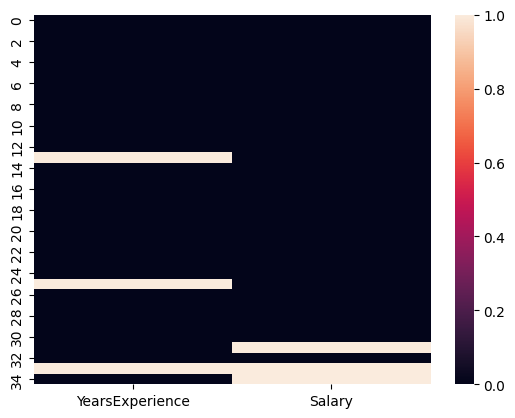

In [7]:
import seaborn as sns
def get_heatmap(df):
  sns.heatmap(df.isnull())
  return plt.show()

get_heatmap(df)

In [8]:
df['YearsExperience']=df.YearsExperience.fillna(df.YearsExperience.median())
import math
df['Salary']=df.Salary.fillna(math.floor(df.Salary.mean()))

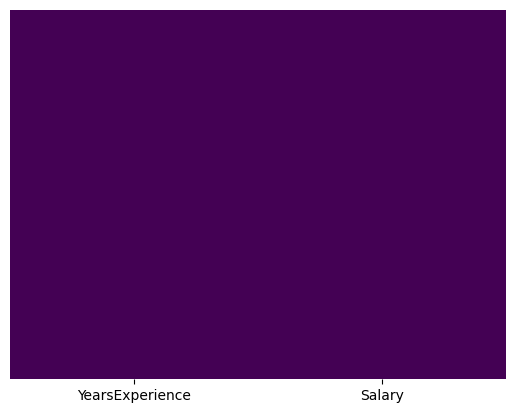

In [9]:
import seaborn as sns
def get_heatmap(df):
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

In [10]:
import numpy as np
X=np.array(df[['YearsExperience']])
X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.7],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 4.7],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 9. ],
       [ 4. ],
       [ 4.1],
       [ 4.7],
       [ 9.5]])

In [11]:
Y=np.array(df[['Salary']])
print(Y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]
 [105582.]
 [ 76336.]
 [ 57081.]
 [ 76336.]
 [ 76336.]]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 8163.71621500359


In [30]:
model.score(X_test,Y_test)*100

90.17991834625666

In [31]:
model.score(X_train,Y_train)*100

80.02754830729403

In [32]:
model.score(X,Y)*100

82.65343664703114

In [33]:
model.coef_

array([[8265.11620603]])

In [34]:
model.intercept_

array([32624.0593593])

In [35]:
Y_line=(model.coef_*X)+model.intercept_ #-->Best fit Line

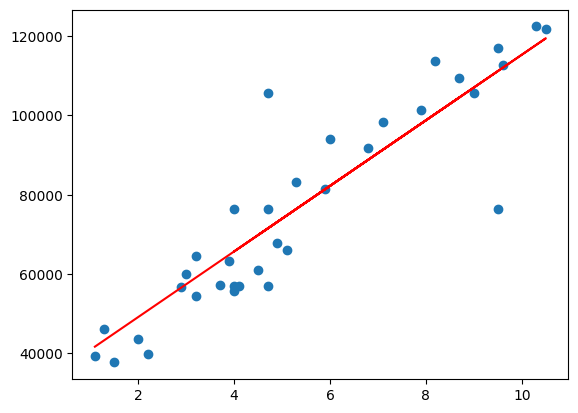

In [36]:
#plotting for data
plt.scatter(X,Y)
plt.plot(X,Y_line, color='red')

**Calculate Salary for User Input Experience**

In [37]:
in_years=int(input("Enter years of experience: "))
salary=(model.coef_*in_years)+model.intercept_
print("Expected salary is Rs.",salary)

Enter years of experience: 4
Expected salary is Rs. [[65684.52418342]]
